
## Data prerequisites for k-means

In order to successfully apply k-means to clustering problems, you need to ensure that the data meets the three prerequisites outlined below. If you apply k-means to data that doesn't meet these assumptions, you will get incorrect, unintuitive results.

1. **Cluster number is $k$:** K-means assumes that the correct cluster number is $k$. Because you provide the value of $k$ to k-means, you need to determine the best value. However, most of the time, determining $k$ is not trivial, and you need to run k-means with several $k$ values and choose the one that makes the most sense to you. In the next lesson, you'll explore how to measure the performances of clustering algorithms. Using those techniques, you should choose the best $k$ among the alternatives.
2. **Clusters are isotropic:** K-means assumes that the underlying "true" clusters are radially symmetrical (isotropic), meaning that they are uniform in all directions and the edges curve outward. If this assumption fails, k-means would come up with unuseful clusters. However, in the later lessons of this module, you'll learn about other clustering methods that can handle non-isotropic clustering structures.
3. **Similar variance:** K-means also assumes all clusters have similar variance.

The plot below demonstrates how k-means can produce unintuitive clusters when its assumptions are not met. In particular, if you discover that your data violates the second and third assumptions, you need to resort to other clustering techniques. These will be covered in the later lessons in this module.

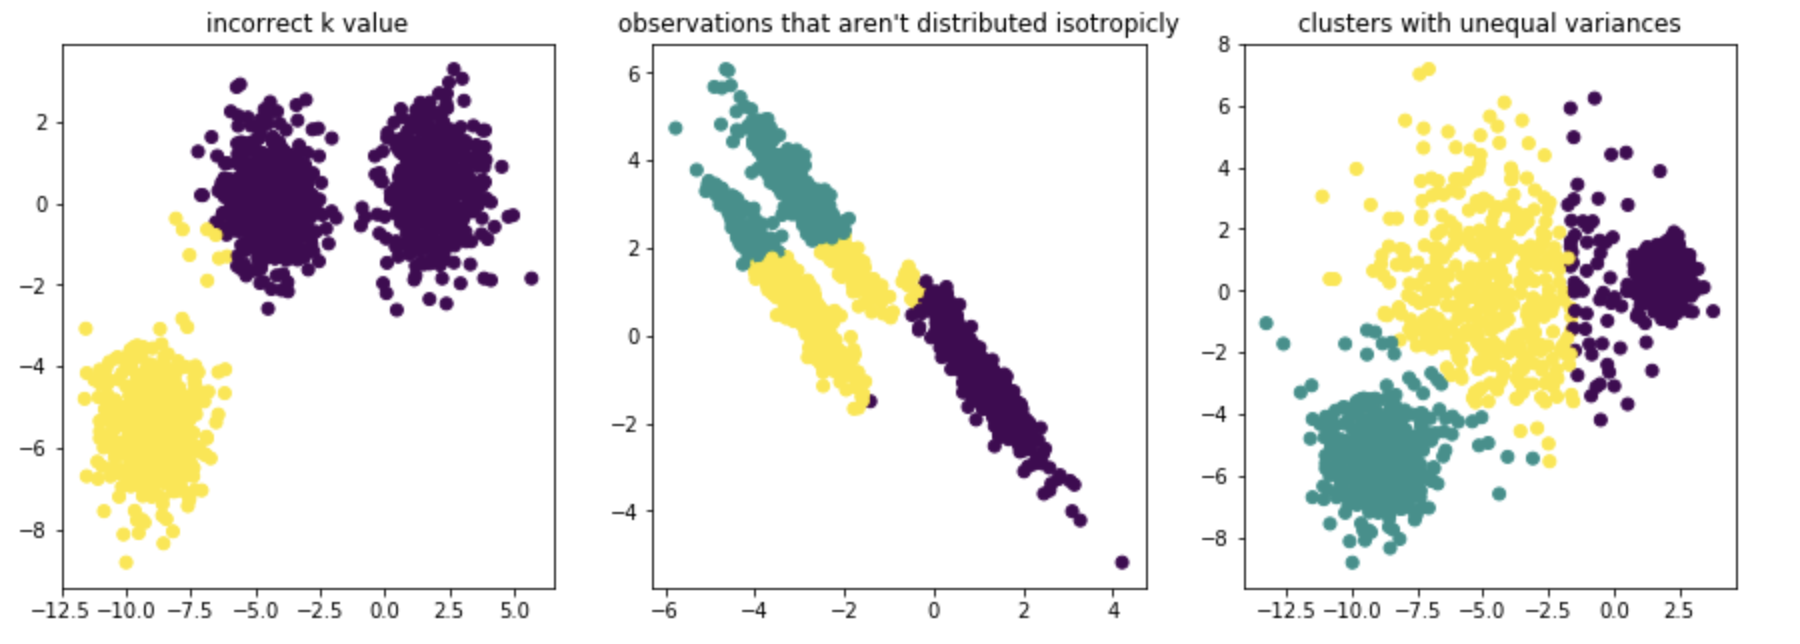

## Important points to consider

When you're applying k-means, there are some key points that you'll need to consider:

* The initial selection of centroids is important. One popular way to begin is to randomly choose $k$ of the samples. However, like other iterative algorithms with a random start, bad starting centroid values can cause k-means to arrive at lousy solutions. So it's better to try the algorithm a few times with different starting centroids. The scikit-learn implementation has a nifty `kmeans++` option (which is also the default) for initializing centroids that are distant from each other, and this approach is less likely to result in a flawed solution. Moreover, by default, scikit-learn runs the algorithm 10 times (you can set it to a different value using `n_init` parameter) with different centroid seeds. Then it selects the best output in terms of inertia. The animation below demonstrates how when k-means is initialized with bad starting centroids, it arrives at a suboptimal solution:     
    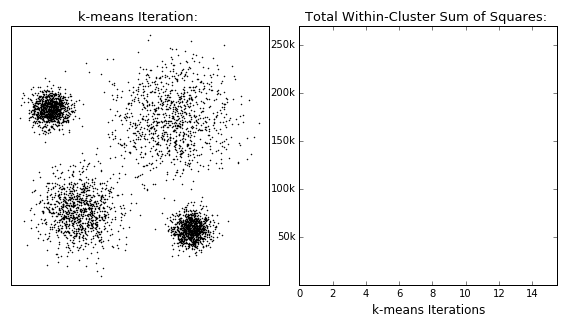

* The outcome of k-means can be sensitive to the scale of the data. So, it's common to standardize each variable before applying k-means.
* The results depend on the value of $k$. So, choosing the correct $k$ is essential so that the algorithm can find the correct clusters. But, how do you pick $k$? Unfortunately, there isn't a clear-cut solution. You need to search for true $k$ through trial and error. You pick some set of $k$ and look at the clusters produced by the algorithm. Then you pick the value such that the algorithm seems to produce the most *reasonable* clusters. The reasonable clusters representing "real" divisions in the data will be stable across the training set and the test set. You'll explore this topic in more detail in the next lesson.

## Performance considerations

The average complexity of the k-means algorithm is $O(k n T)$, where $n$ is the number of observations and $T$ is the number of iterations. Hence, high-dimensional data tends to make k-means run more slowly because it is more computationally demanding to measure the distance between each data point and the mean in a higher-dimensional space. That being said, in practice, k-means is one of the fastest clustering algorithms available.

A common practice when you have too many dimensions is to run a **PCA on the data first** to reduce dimensionality, and then search for clusters in the reduced data. When the number of observations is high (100,000 or above) and you have limited computational power or time, another option is to use `MiniBatchKMeans` in scikit-learn. This algorithm randomly samples subsets of the training data in each iteration. The loop steps are similar to those in the original:

1. Assign the samples to their nearest centroids.
2. Update the centroids based on the streaming average of all of the samples that have been assigned to the centroid so far.

The solution that you get will be a little worse than regular k-means, but the algorithm runs drastically faster.

## K-means in action

Scikit-learn has a module called `cluster` that includes several clustering algorithms, including k-means.

### Synthetic data

K-means has an impressive ability to discover *isotropic* (circular) clusters. You can see this by running k-means on some randomly generated data. You'll randomly sample two normally distributed datasets with different means, and then cluster them using k-means. Note that, although the means of the two variables are different, you make their variance the same. This is because k-means works best if the variances in the clusters are the same, as was mentioned earlier when you learned about the assumptions of k-means.

Begin with importing the libraries that you'll use:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

Then, randomly sample from normal distribution and use this to define two variables called `cluster_1` and `cluster_2`. Standardize them using `StandardScaler` from `sklearn.preprocessing`:

In [2]:
cluster_1x = np.random.normal(10,5,500)
cluster_1y = np.random.normal(20,5,500)
cluster_1 = np.concatenate([cluster_1x.reshape(-1,1),cluster_1y.reshape(-1,1)], axis=1)

cluster_2x = np.random.normal(30,5,500)
cluster_2y = np.random.normal(20,5,500)
cluster_2 = np.concatenate([cluster_2x.reshape(-1,1),cluster_2y.reshape(-1,1)], axis=1)

all_data = np.concatenate([cluster_1,cluster_2],axis=0)

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

To apply k-means, use the `KMeans` class from the `sklearn.cluster` module. To measure the runtime, use the [`%timeit` magic command](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) of IPython:

544 ms ± 156 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


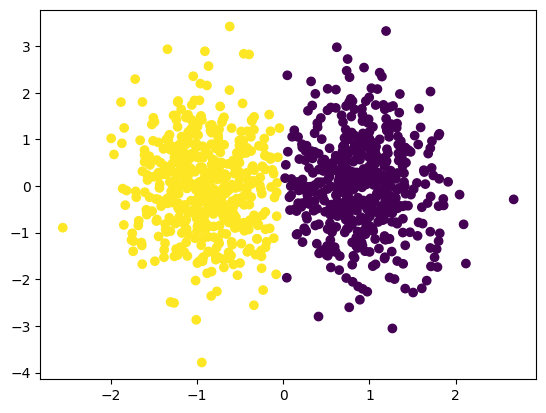

In [3]:
k_means = KMeans(n_clusters=2, n_init=10, random_state=123)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.show()

Clusters seem to capture the correct grouping in the data, and the algorithm took around 14 milliseconds to run. Now, try `MiniBatchKMeans` for comparison:

12.7 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


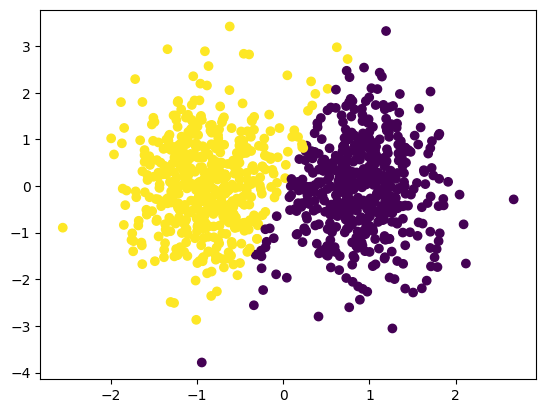

In [4]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, n_init=10, random_state=123)
%timeit mini_batch_k_means.fit(all_data)
y_pred_mini = mini_batch_k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred_mini)
plt.show()

`MiniBatchKMeans` also did a great job, in less than the time of the `KMeans` algorithm!

### *Iris* dataset

Now that you've seen k-means at work on randomly generated data, take a look at a real-world dataset. For this example, you'll use the famous [*Iris* data](https://archive.ics.uci.edu/ml/datasets/iris) from the UC Irvine Machine Learning Repository. This dataset is a standard for exploring clustering and pattern-recognition algorithms. It contains data on three types of iris plants, with 50 instances of each type. Among the three classes, one of them is linearly separable from the other two, whereas the other two aren't linearly separable from one another.

The names of the iris plants are *Iris Setosa*, *Iris Versicolour*, and *Iris Virginica*. Each plant has four features:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

In this example, the goal will be to create a k-means solution that correctly clusters the three types of iris plants.

Note that in this example, you actually know the correct number of clusters in the data: three. But, you'll test whether k-means will assign observations as you expect it to. Because k-means is an unsupervised learning algorithm, it will not use the information regarding the correct classes of the observations.

One important thing to keep in mind is that resulting clusters depend on the explanatory power of the variables that are fed into the clustering algorithms. In the example, the performance of k-means depends on the predictive power of the variables on identifying the plant type. So, if they are weak in this regard, then k-means won't be able to discern the correct classes.

To load the data, you'll use scikit-learn's `datasets` module. After you import the module (`from sklearn import datasets`), load the dataset as follows: `iris = datasets.load_iris()`.

Most of the clustering algorithms are sensitive to the scale of the data. So, before applying k-means, you should also standardize the variables using the `StandardScaler` from `sklearn.preprocessing`, as follows:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Run k-means by setting `n_clusters=3`, because you have three classes of iris plant types in the data. You'll revisit this later when you play with this parameter and experiment with the results.

In [6]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, n_init=10, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

14.5 ms ± 7.24 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Next, visualize the predictions and the true labels of the observations. To plot in two-dimensional space, you need to reduce your data dimensionality. For this purpose, apply PCA and use the first two principal components.

In the plot below, the numbers show the cluster that each observation has been assigned to by the algorithm. The colors denote the true classes.

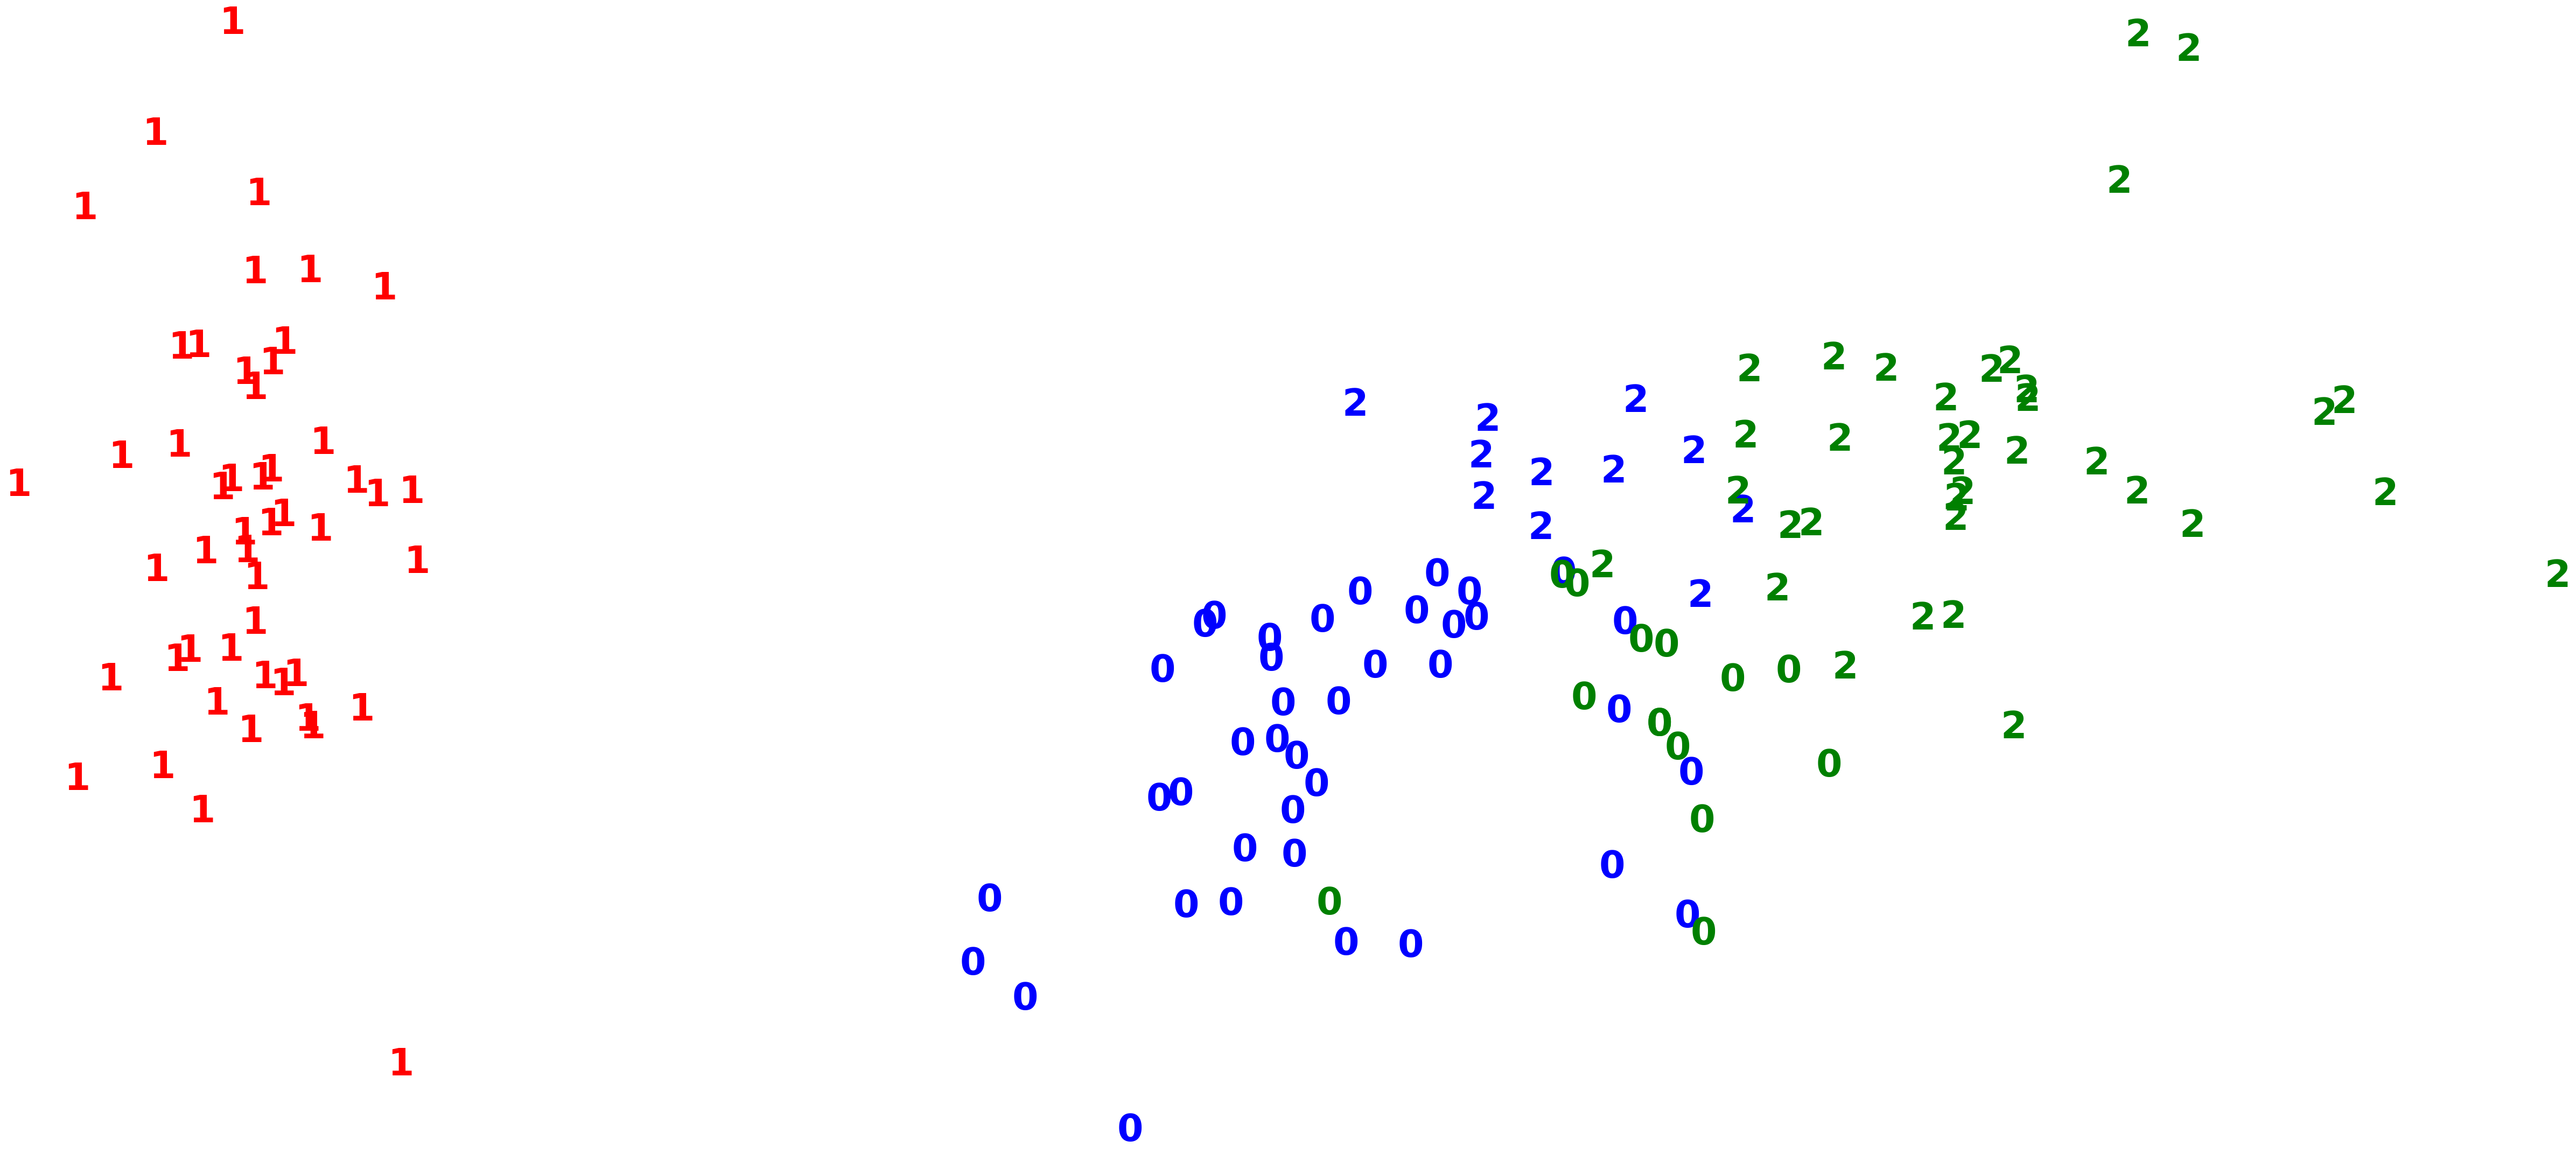

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Not bad! K-means seems to have successfully distinguished the linearly separable class from the other two. However, for the inseparable two classes, the algorithm produced some incorrectly assigned predictions.

Next, try mini-batch k-means:

5.26 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


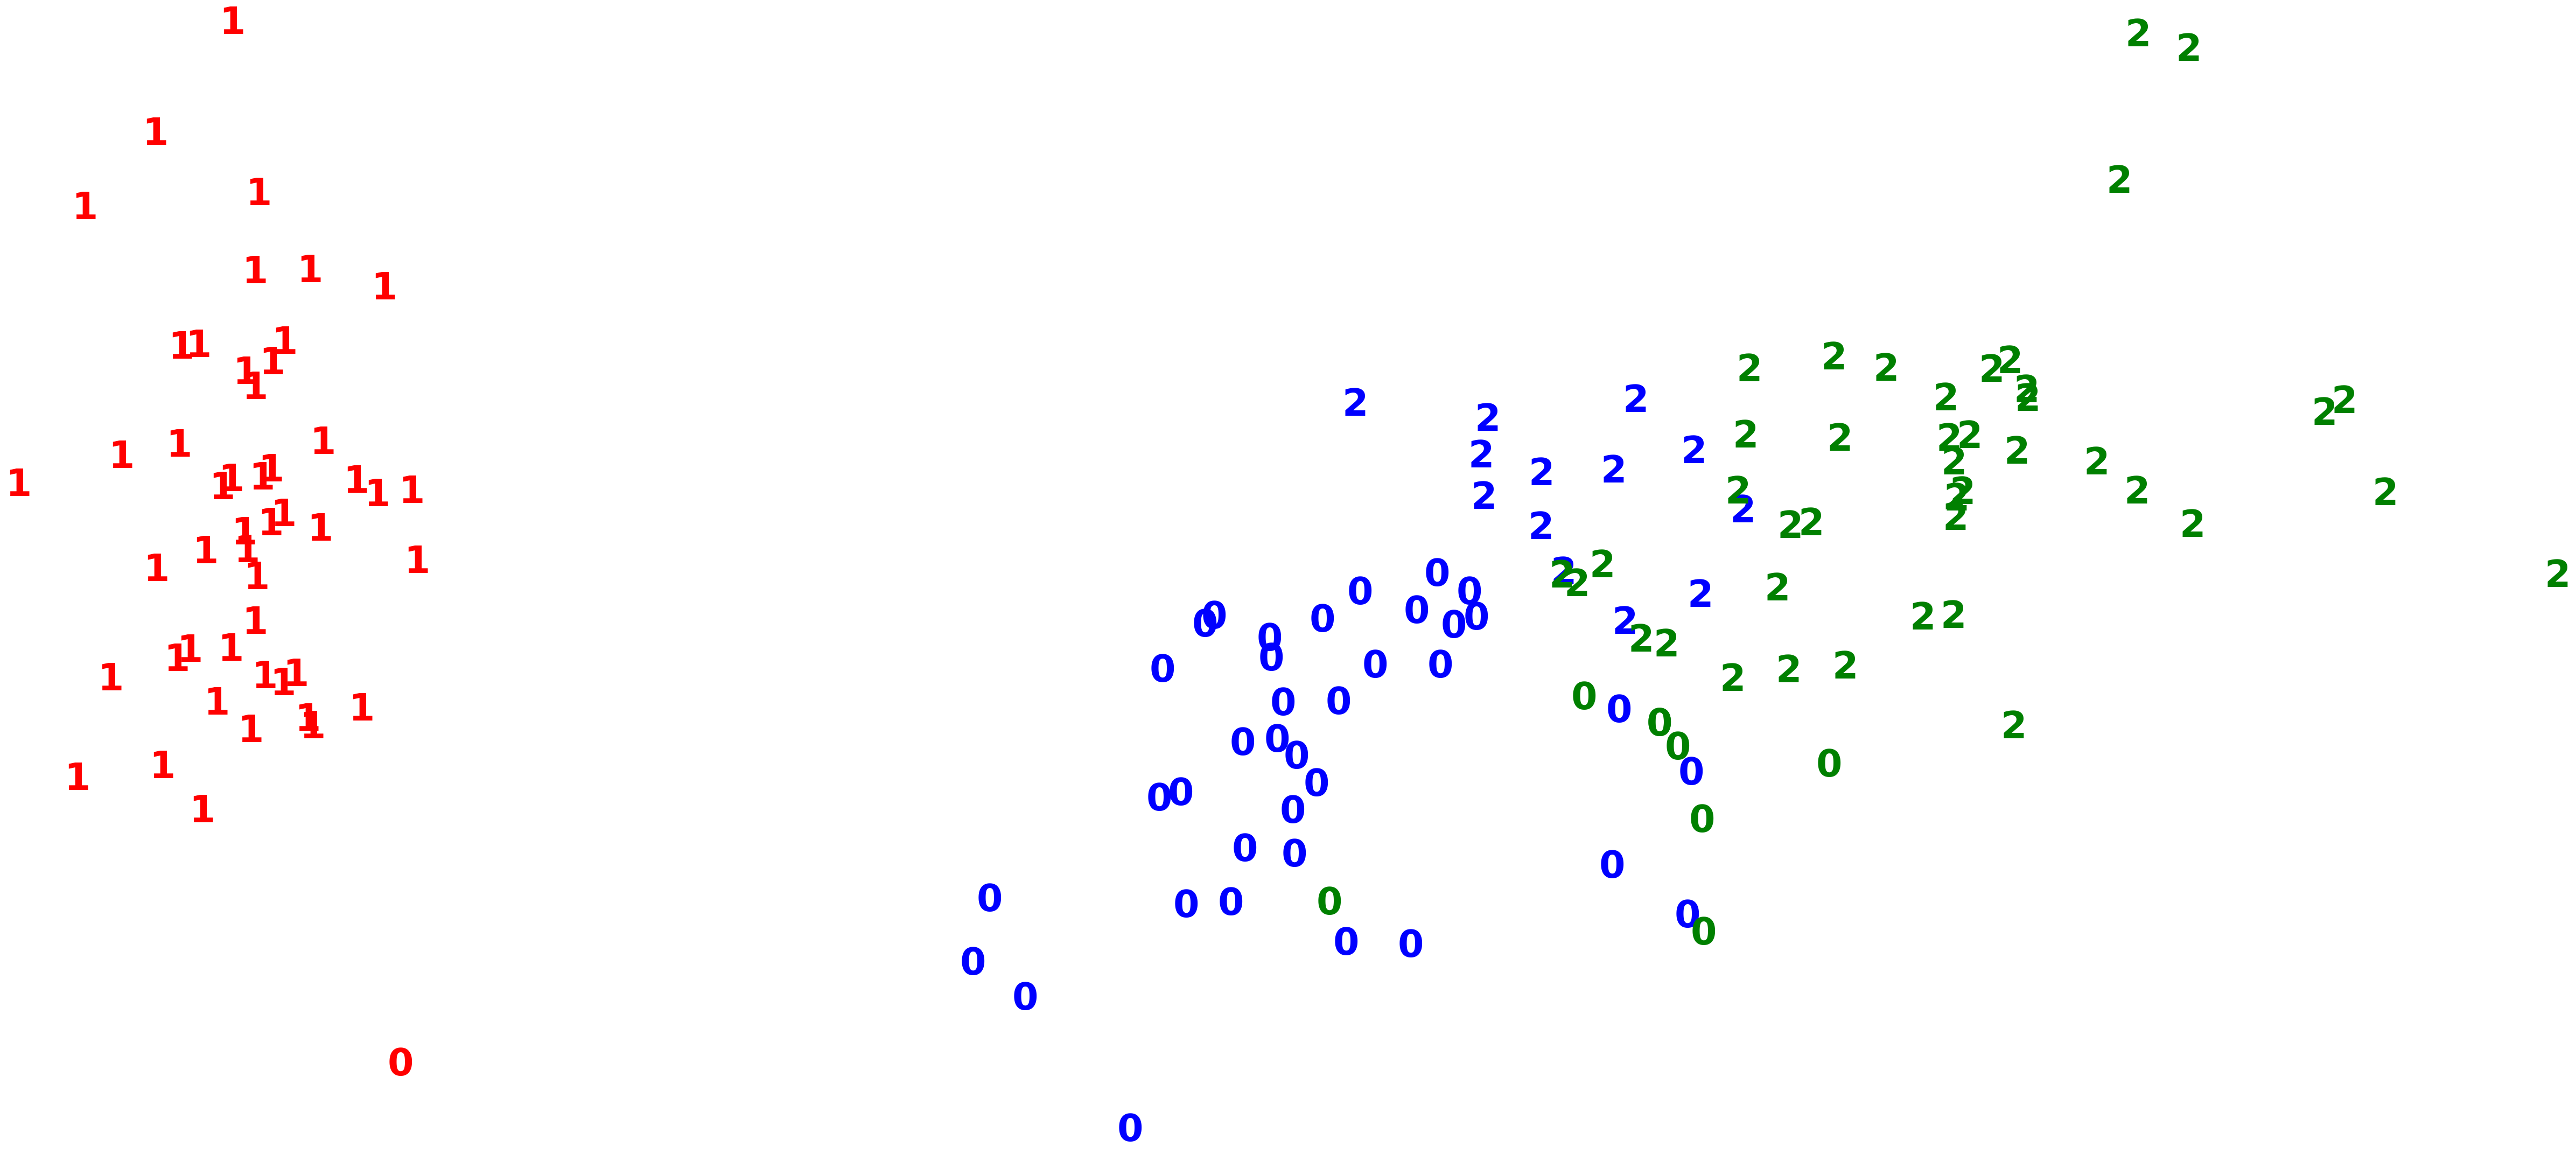

In [8]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Mini-batch k-means produced similar results, but it was more than twice as fast.

## Q1. Apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this dataset?

In [9]:
# Apply K-means to different numbers of clusters and append the result to a list
kmeans_clusters = []
for i in range(1,9):
    k_means = KMeans(n_clusters=i, n_init=10, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

Now, visualize the action of K-means to different clusters.

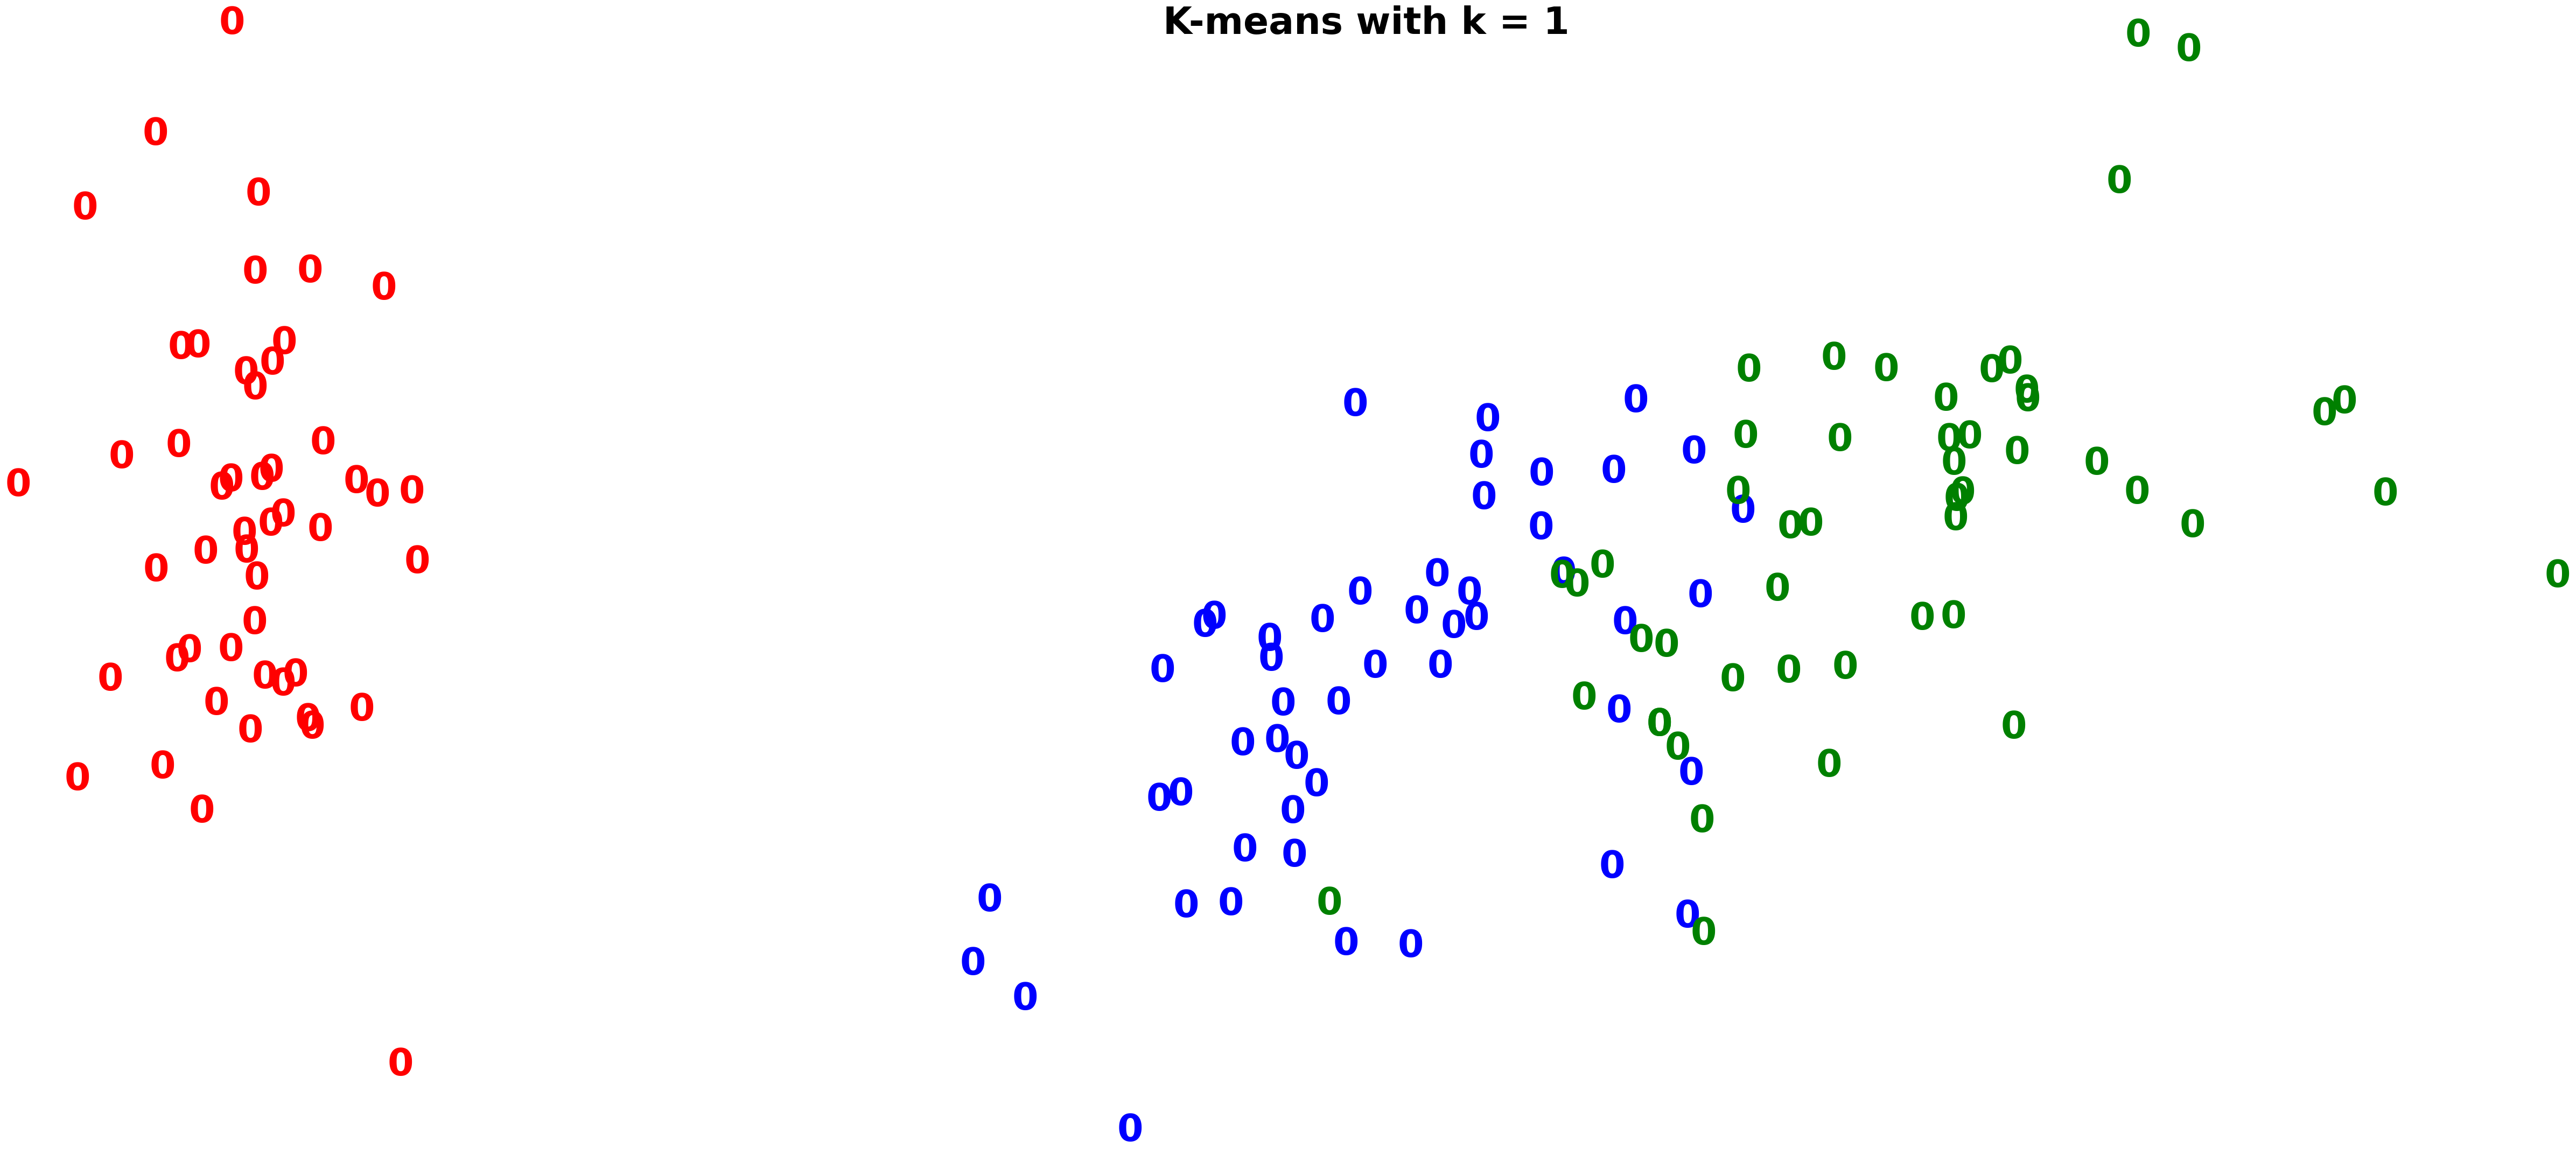

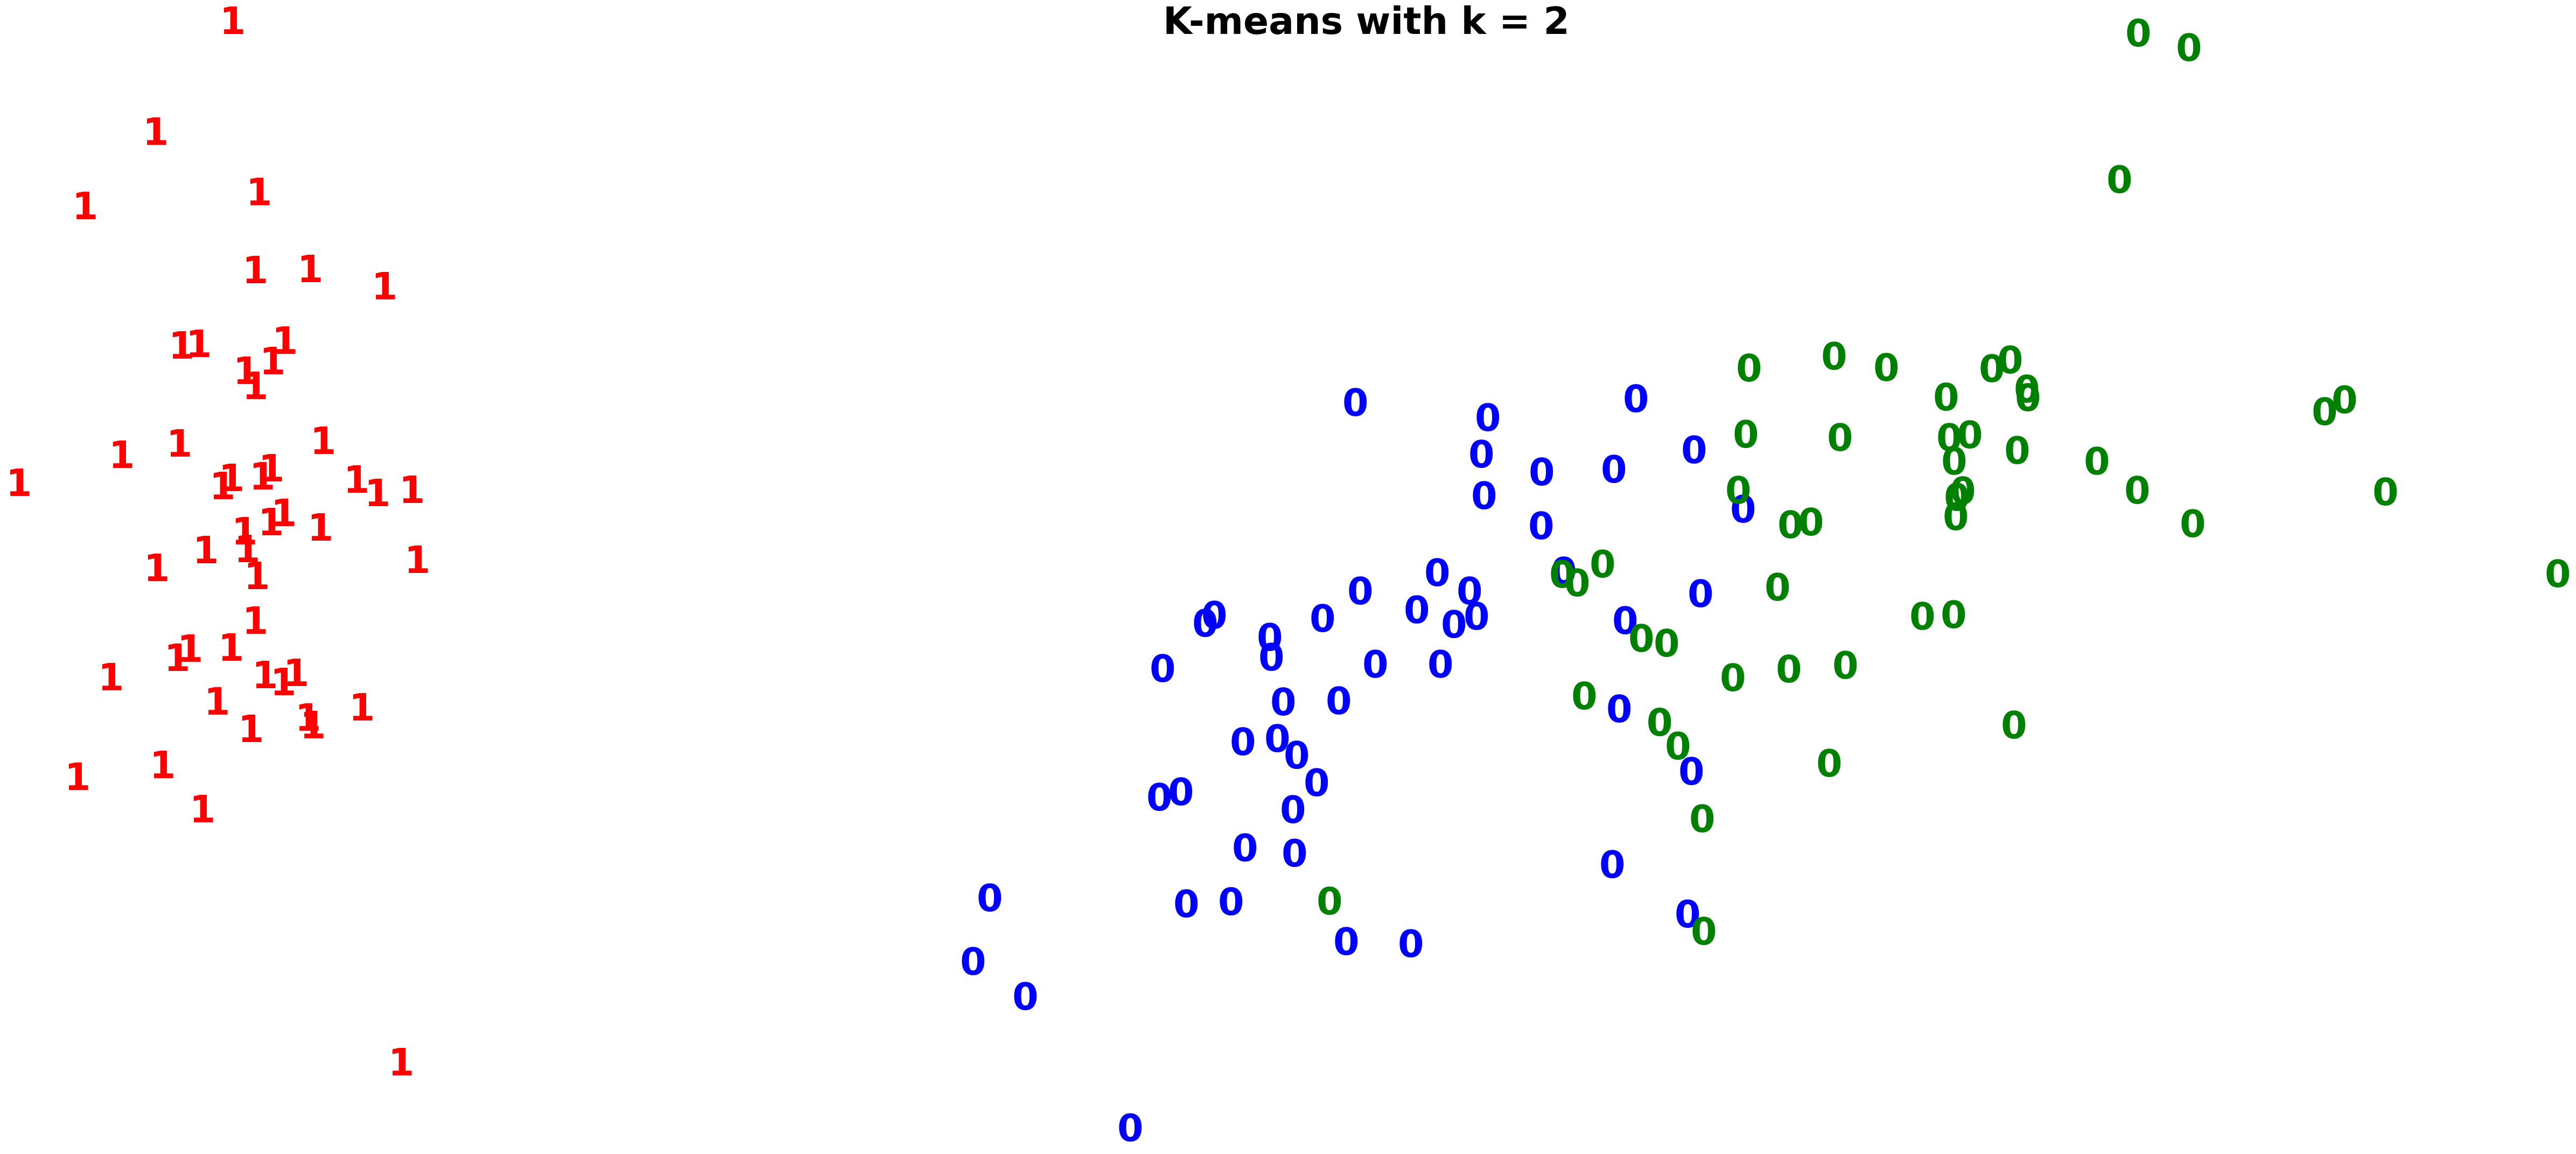

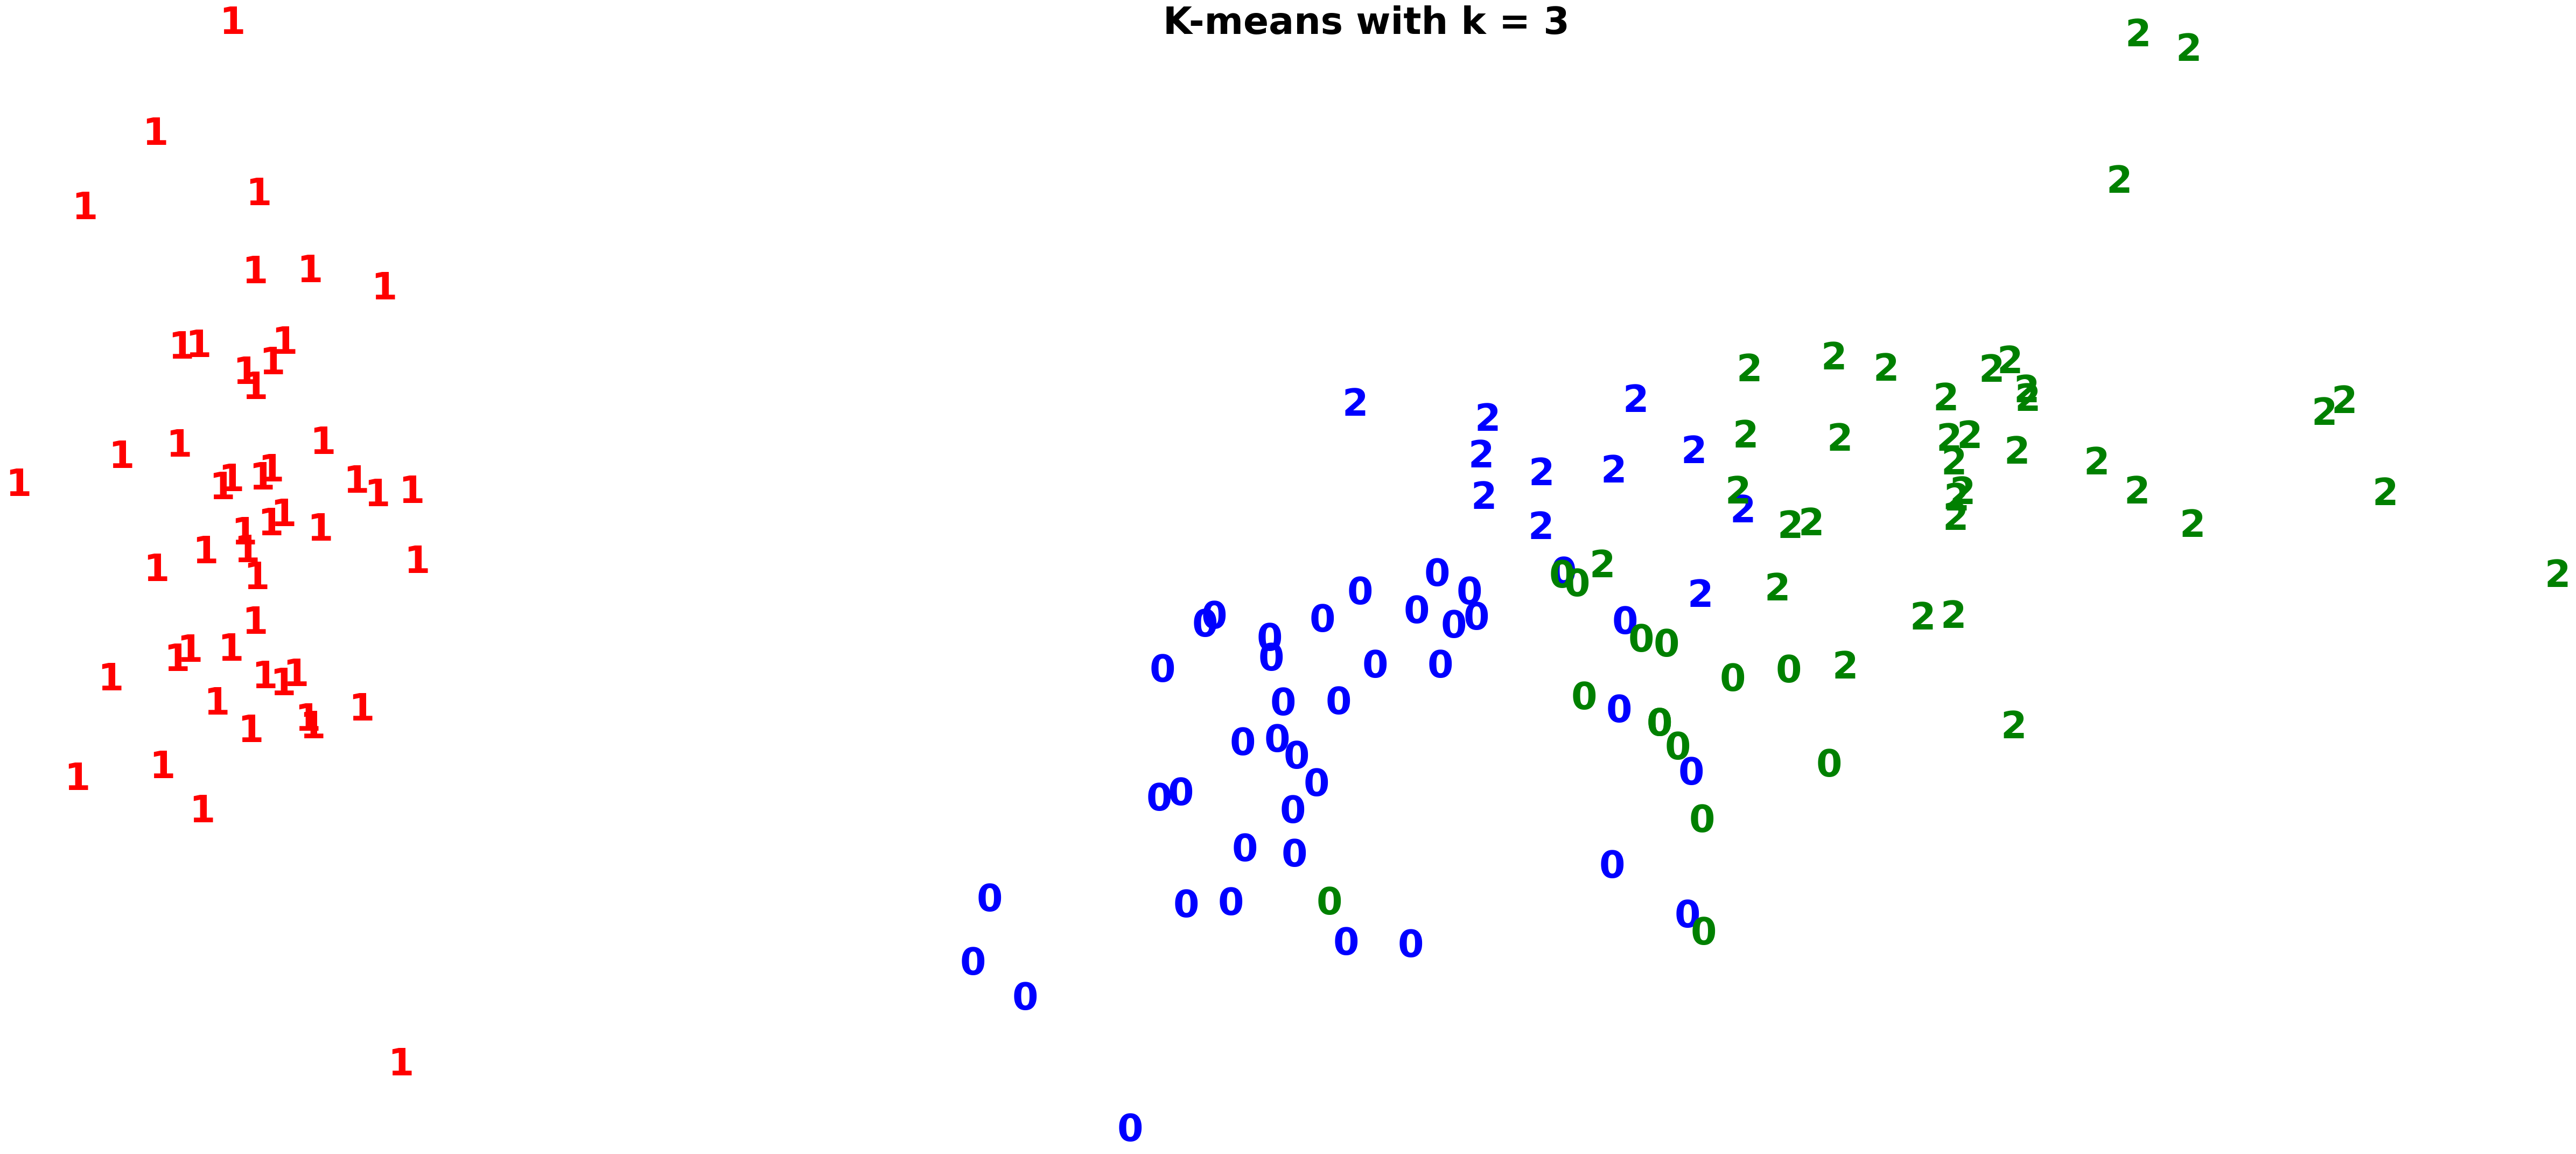

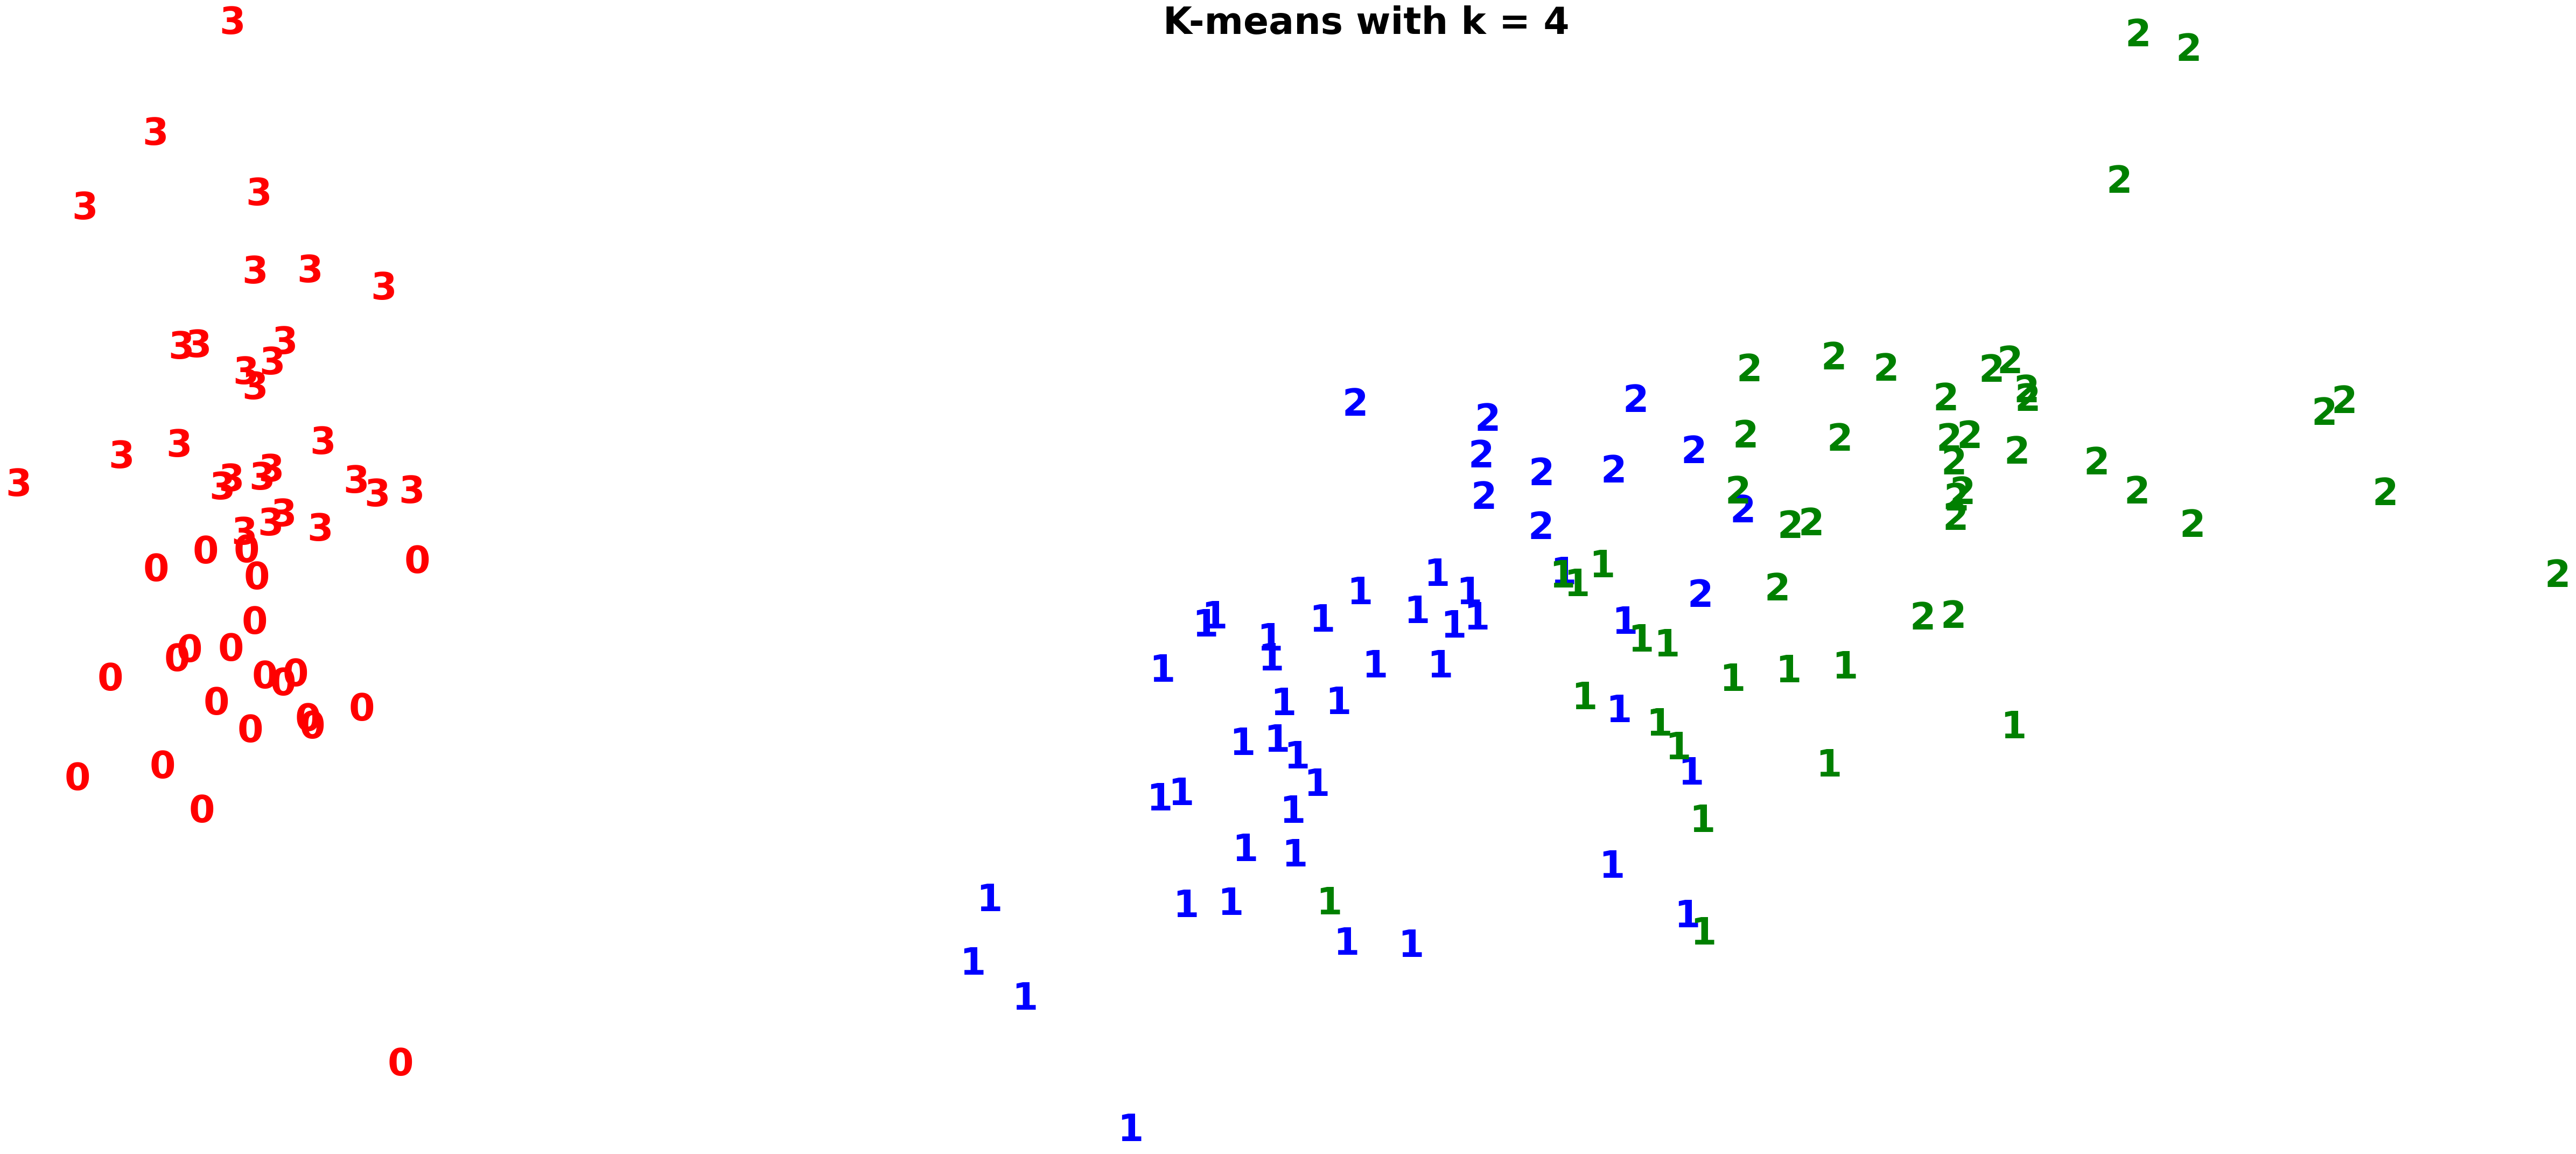

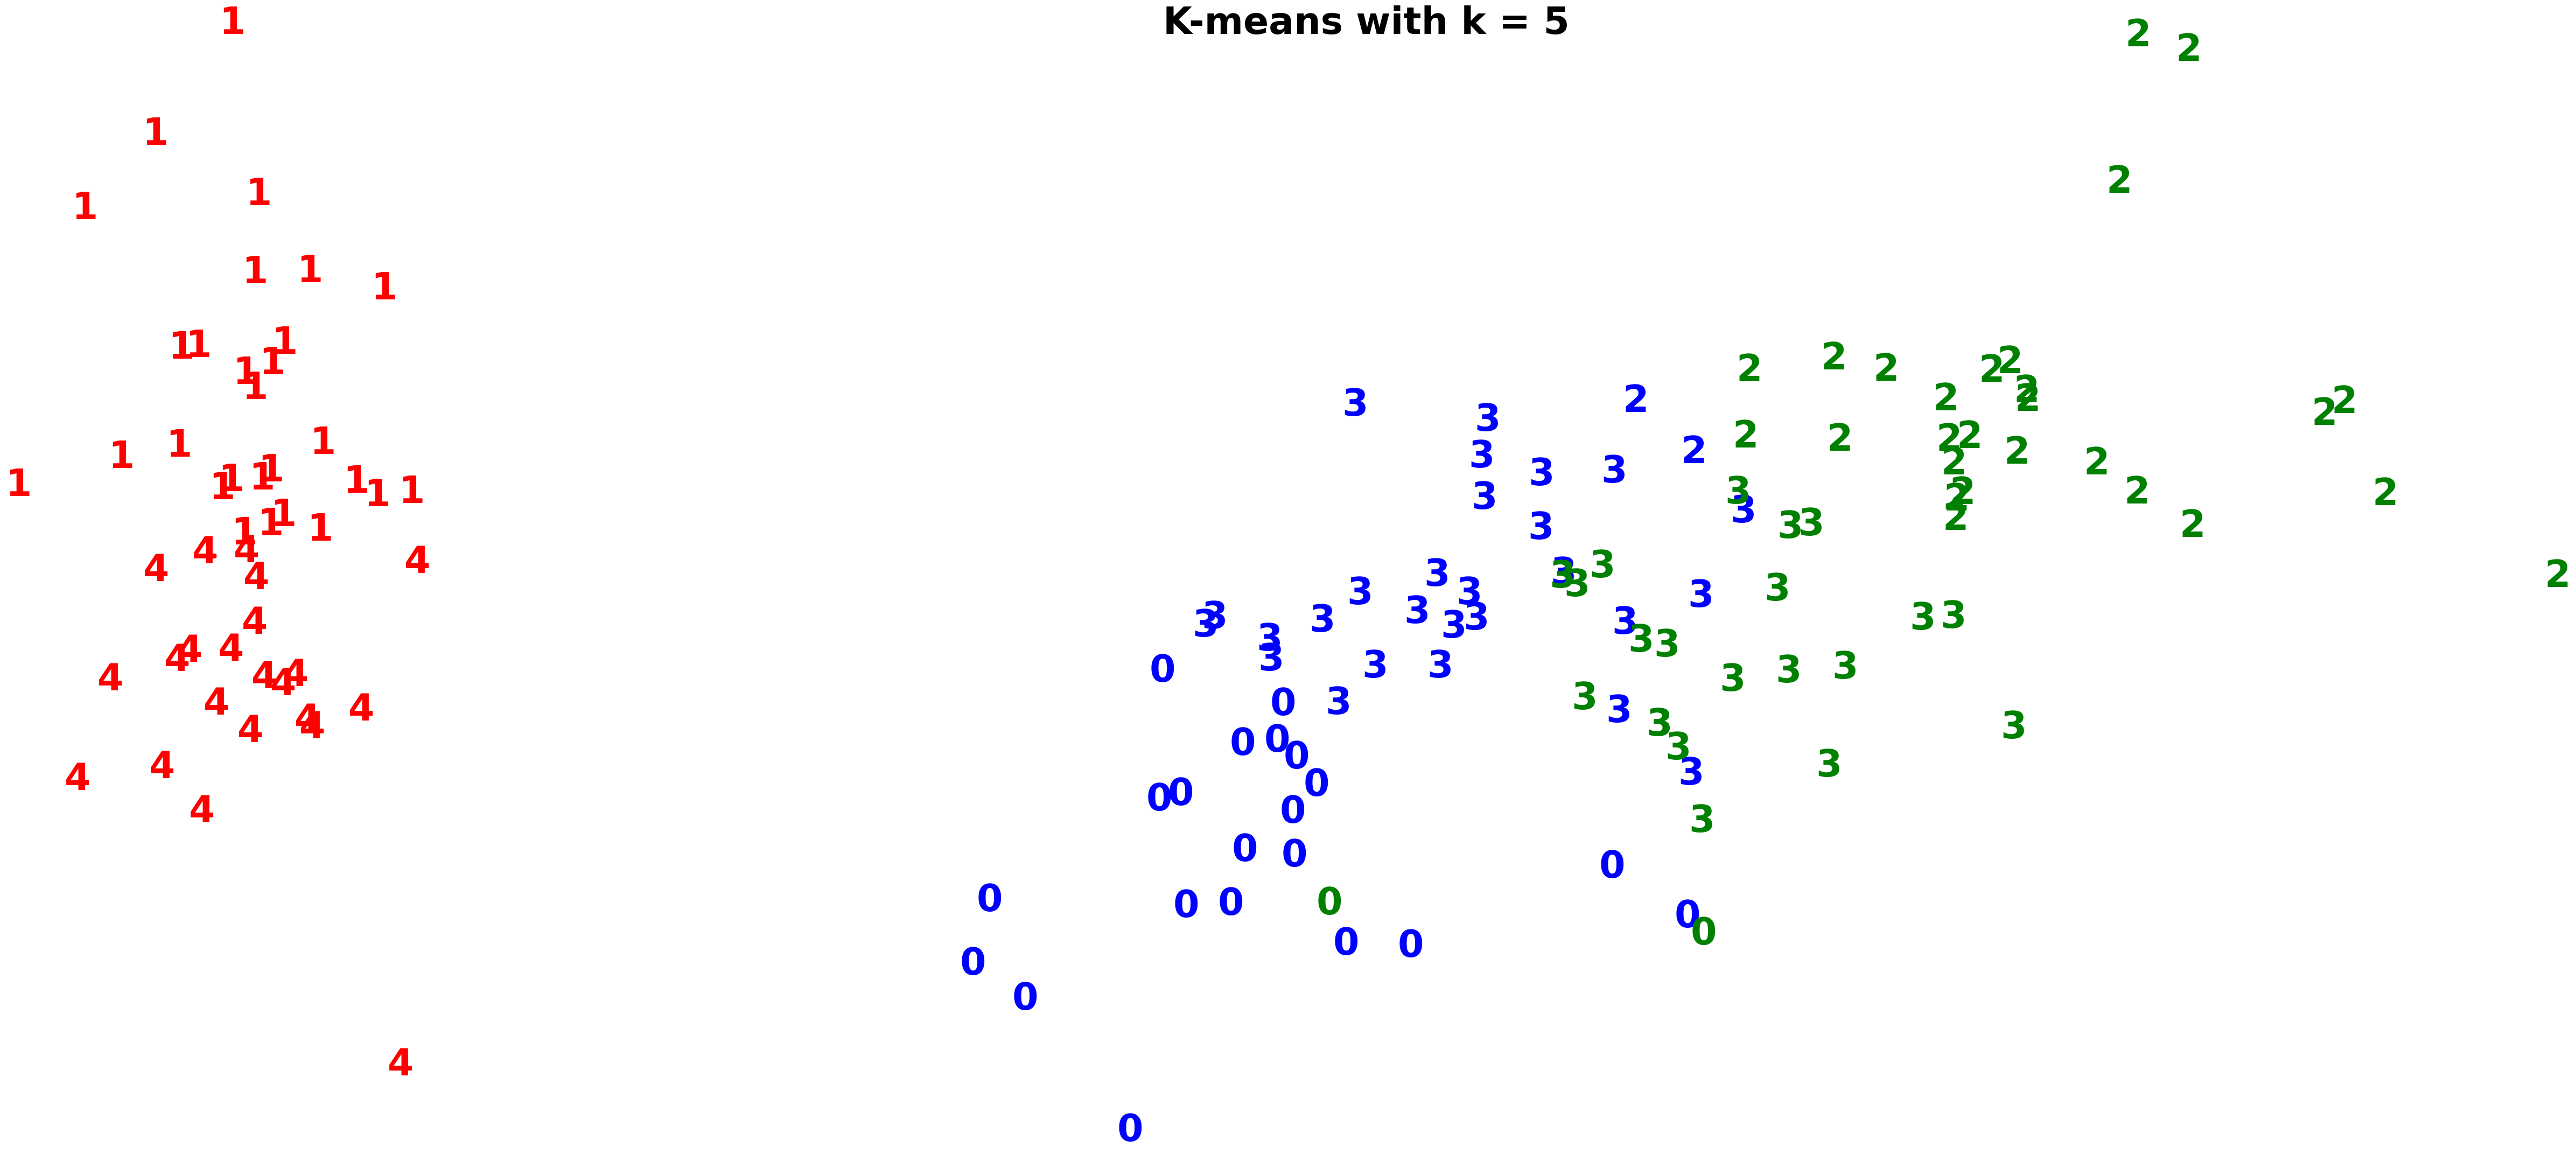

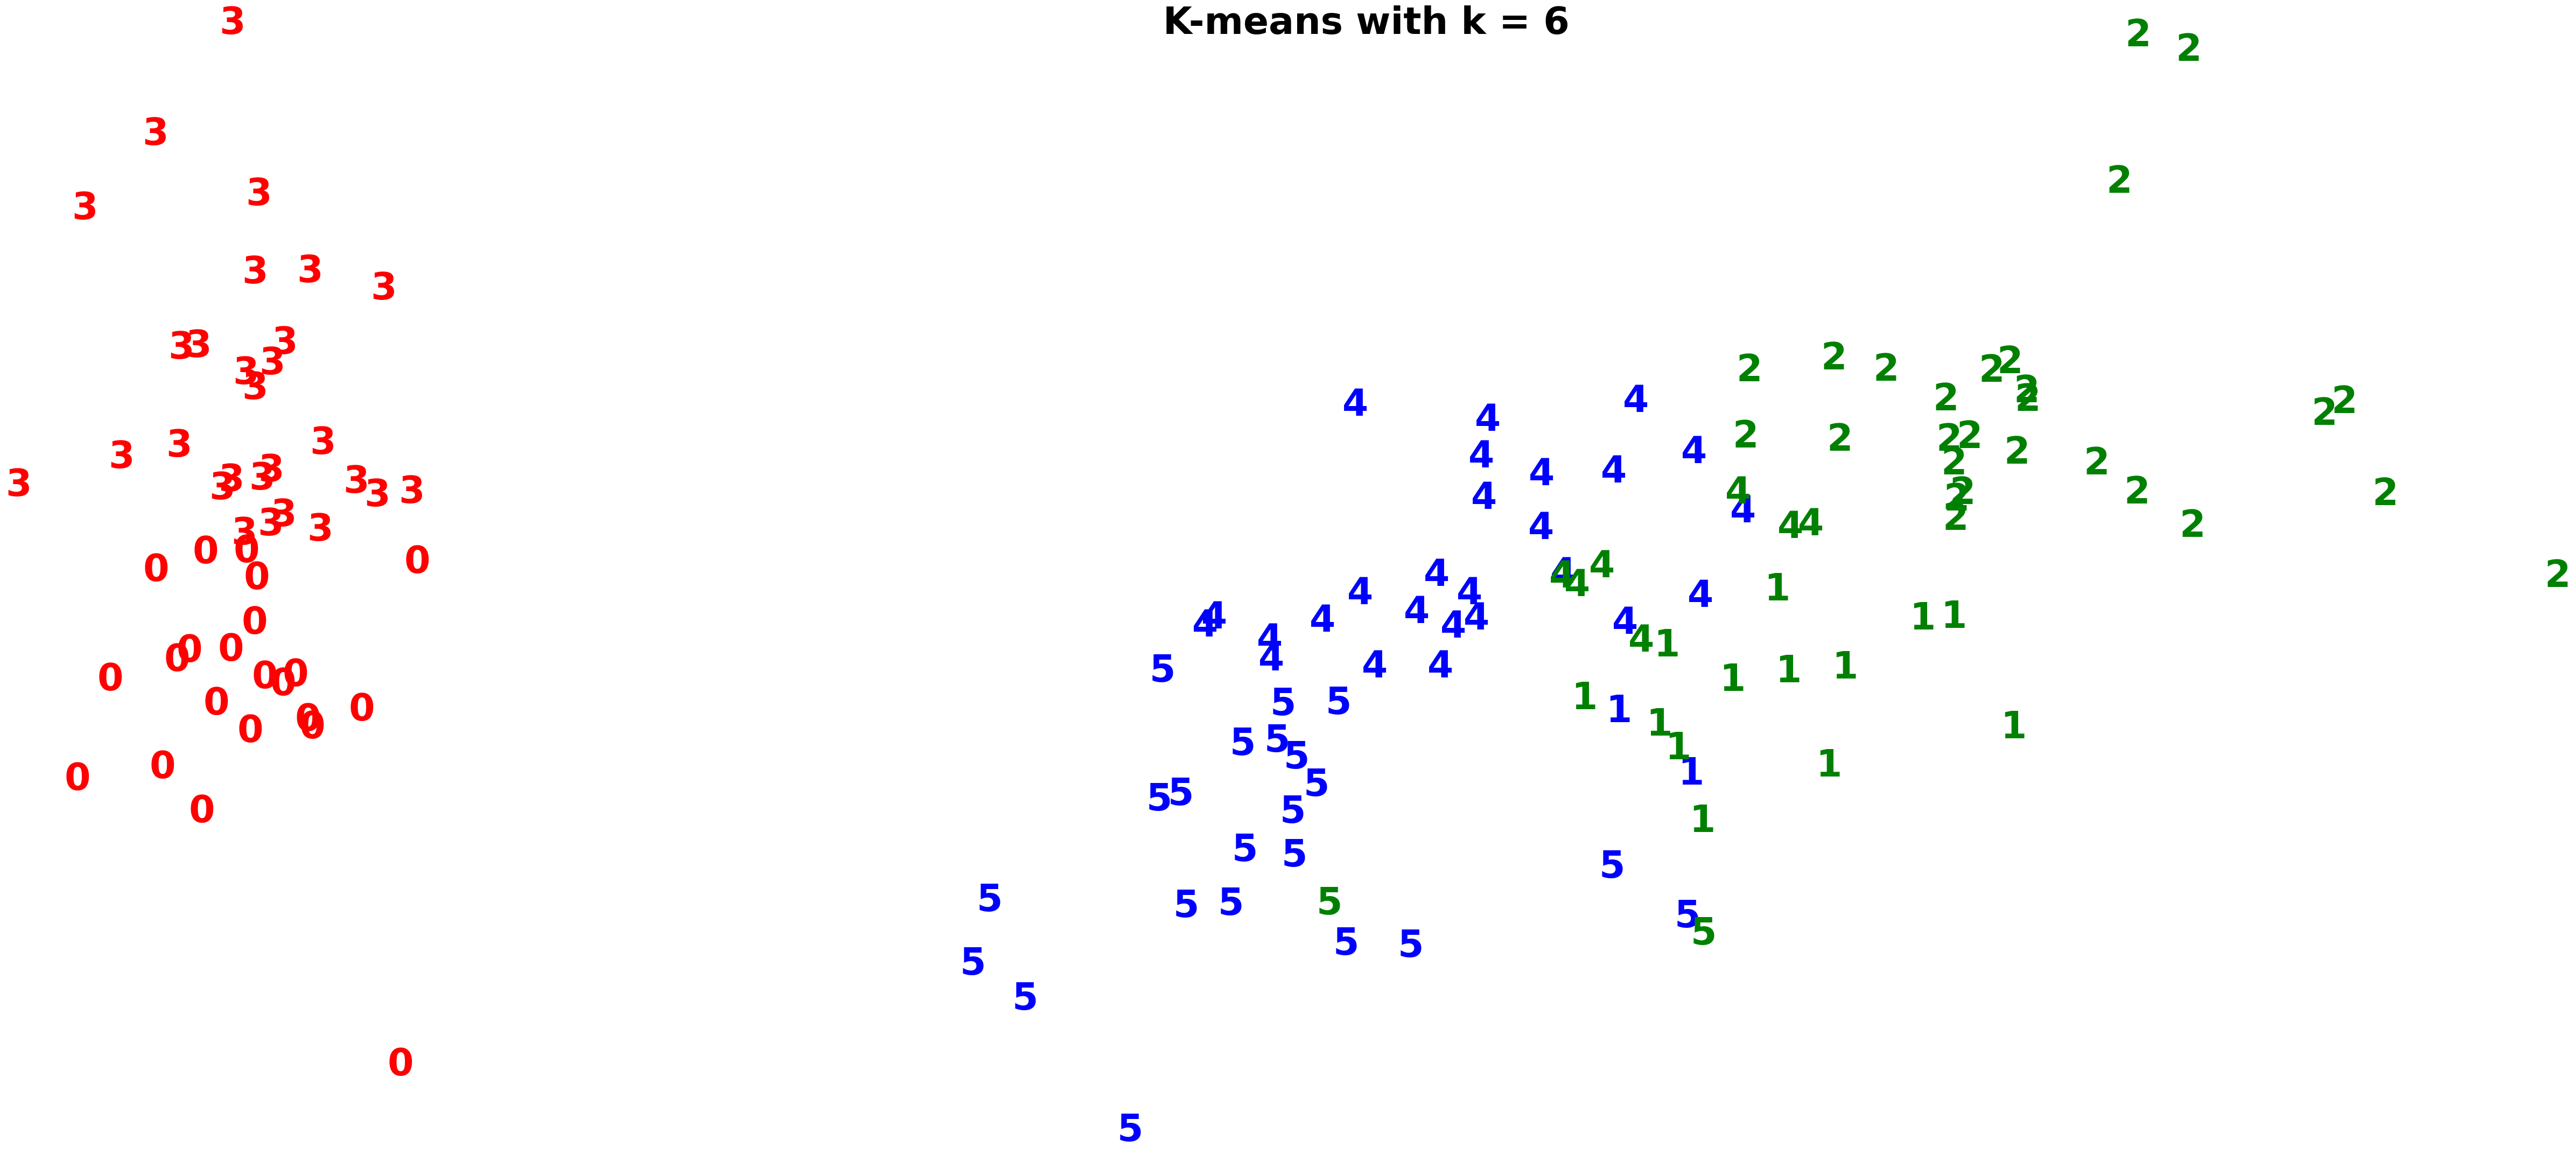

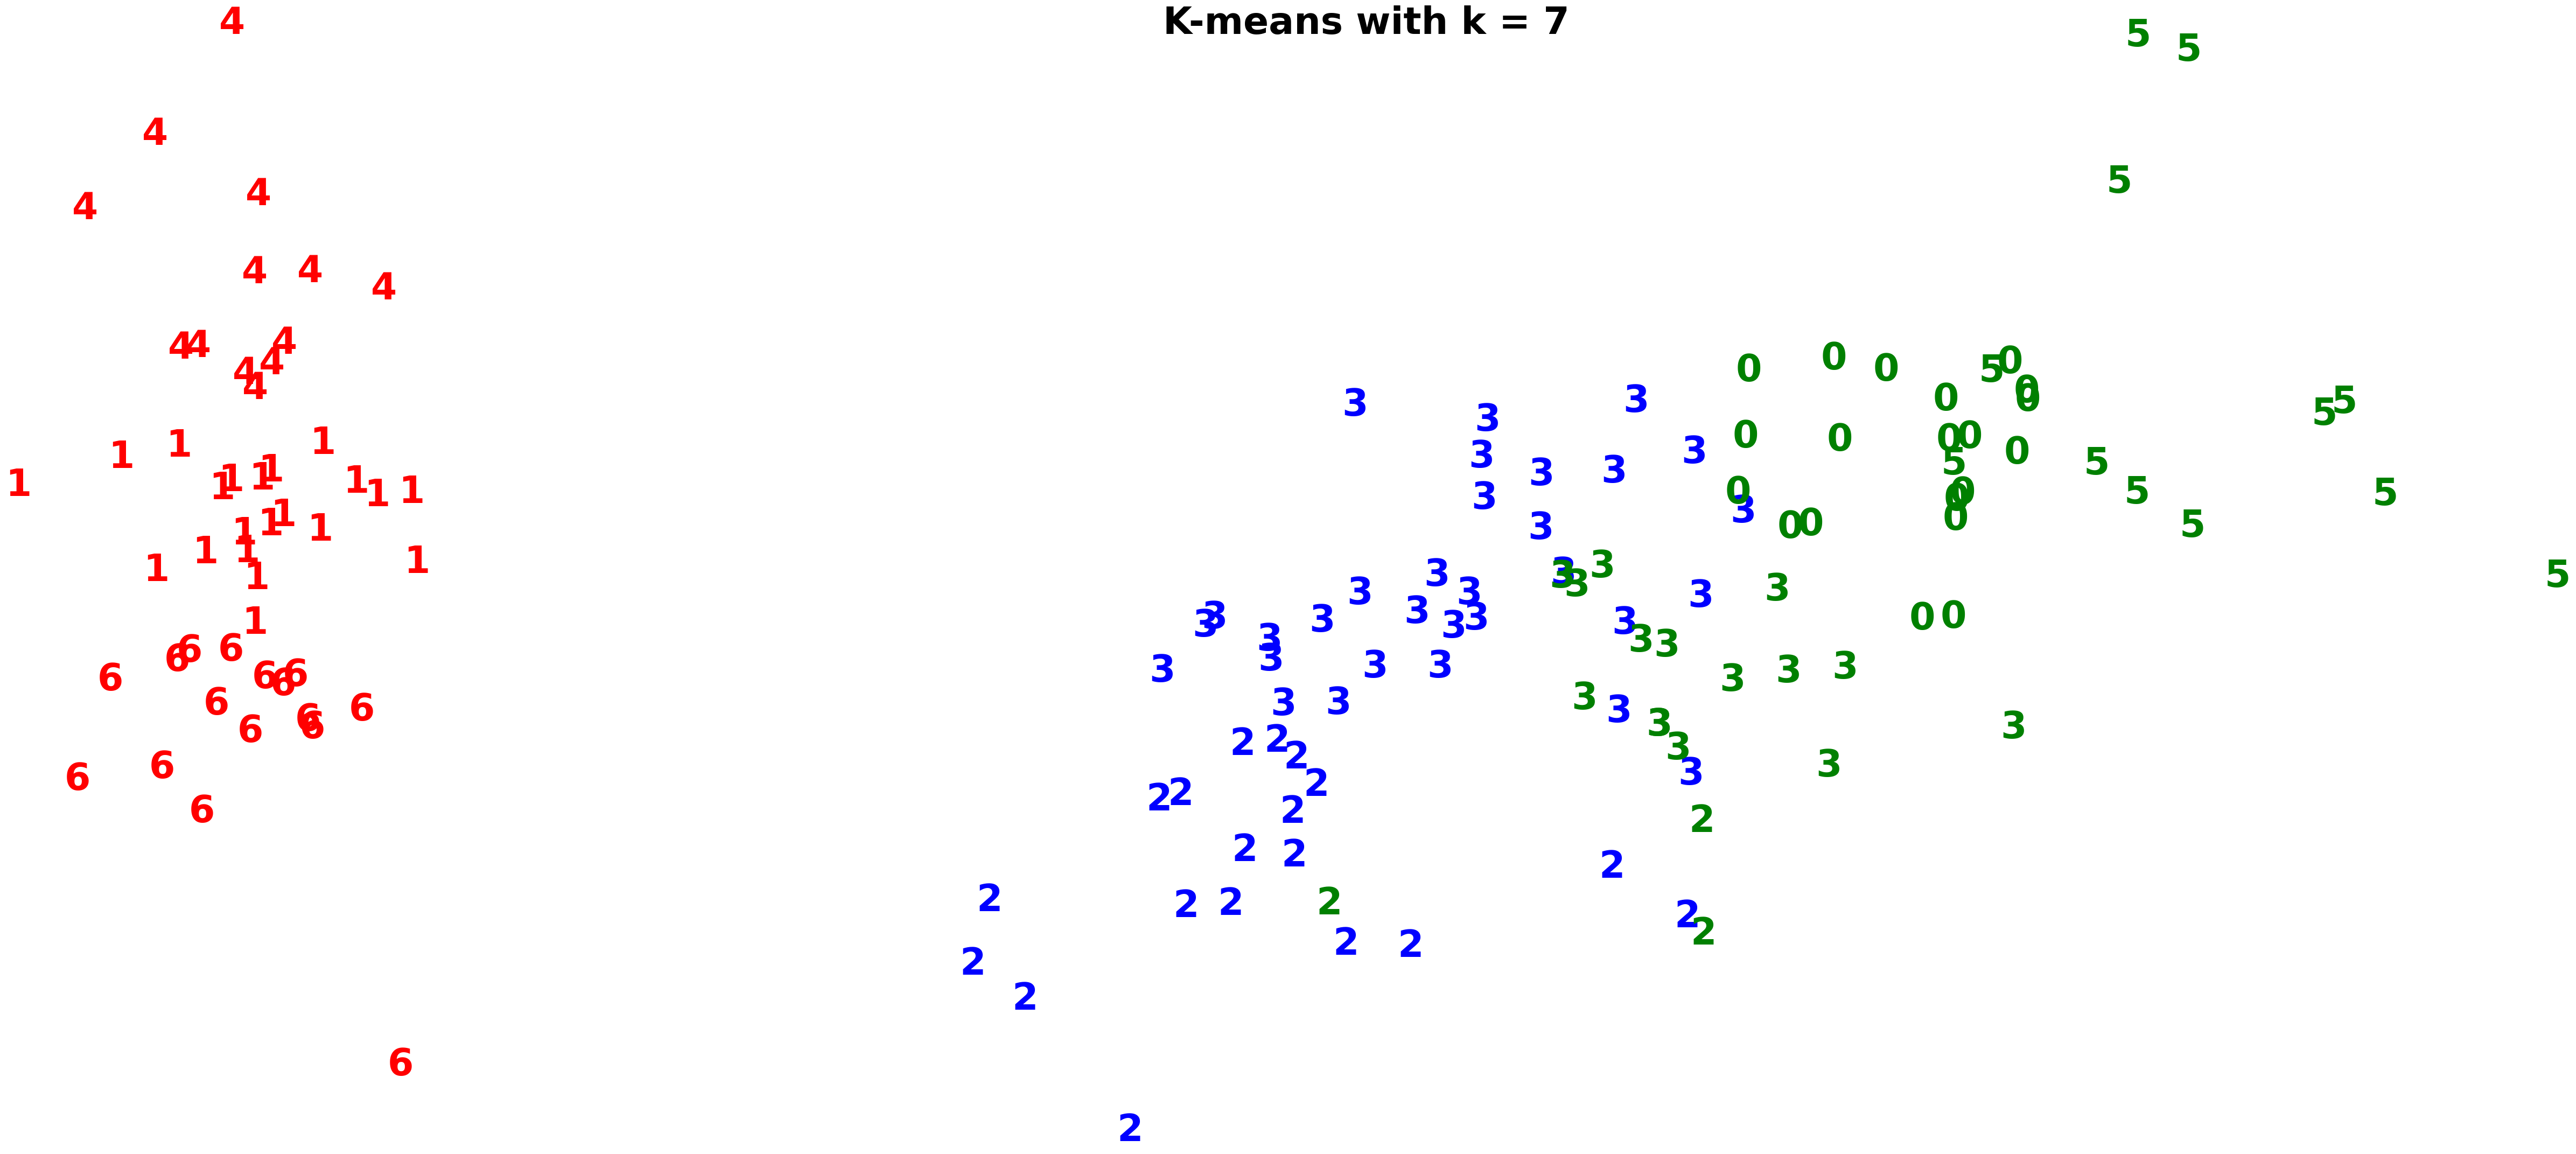

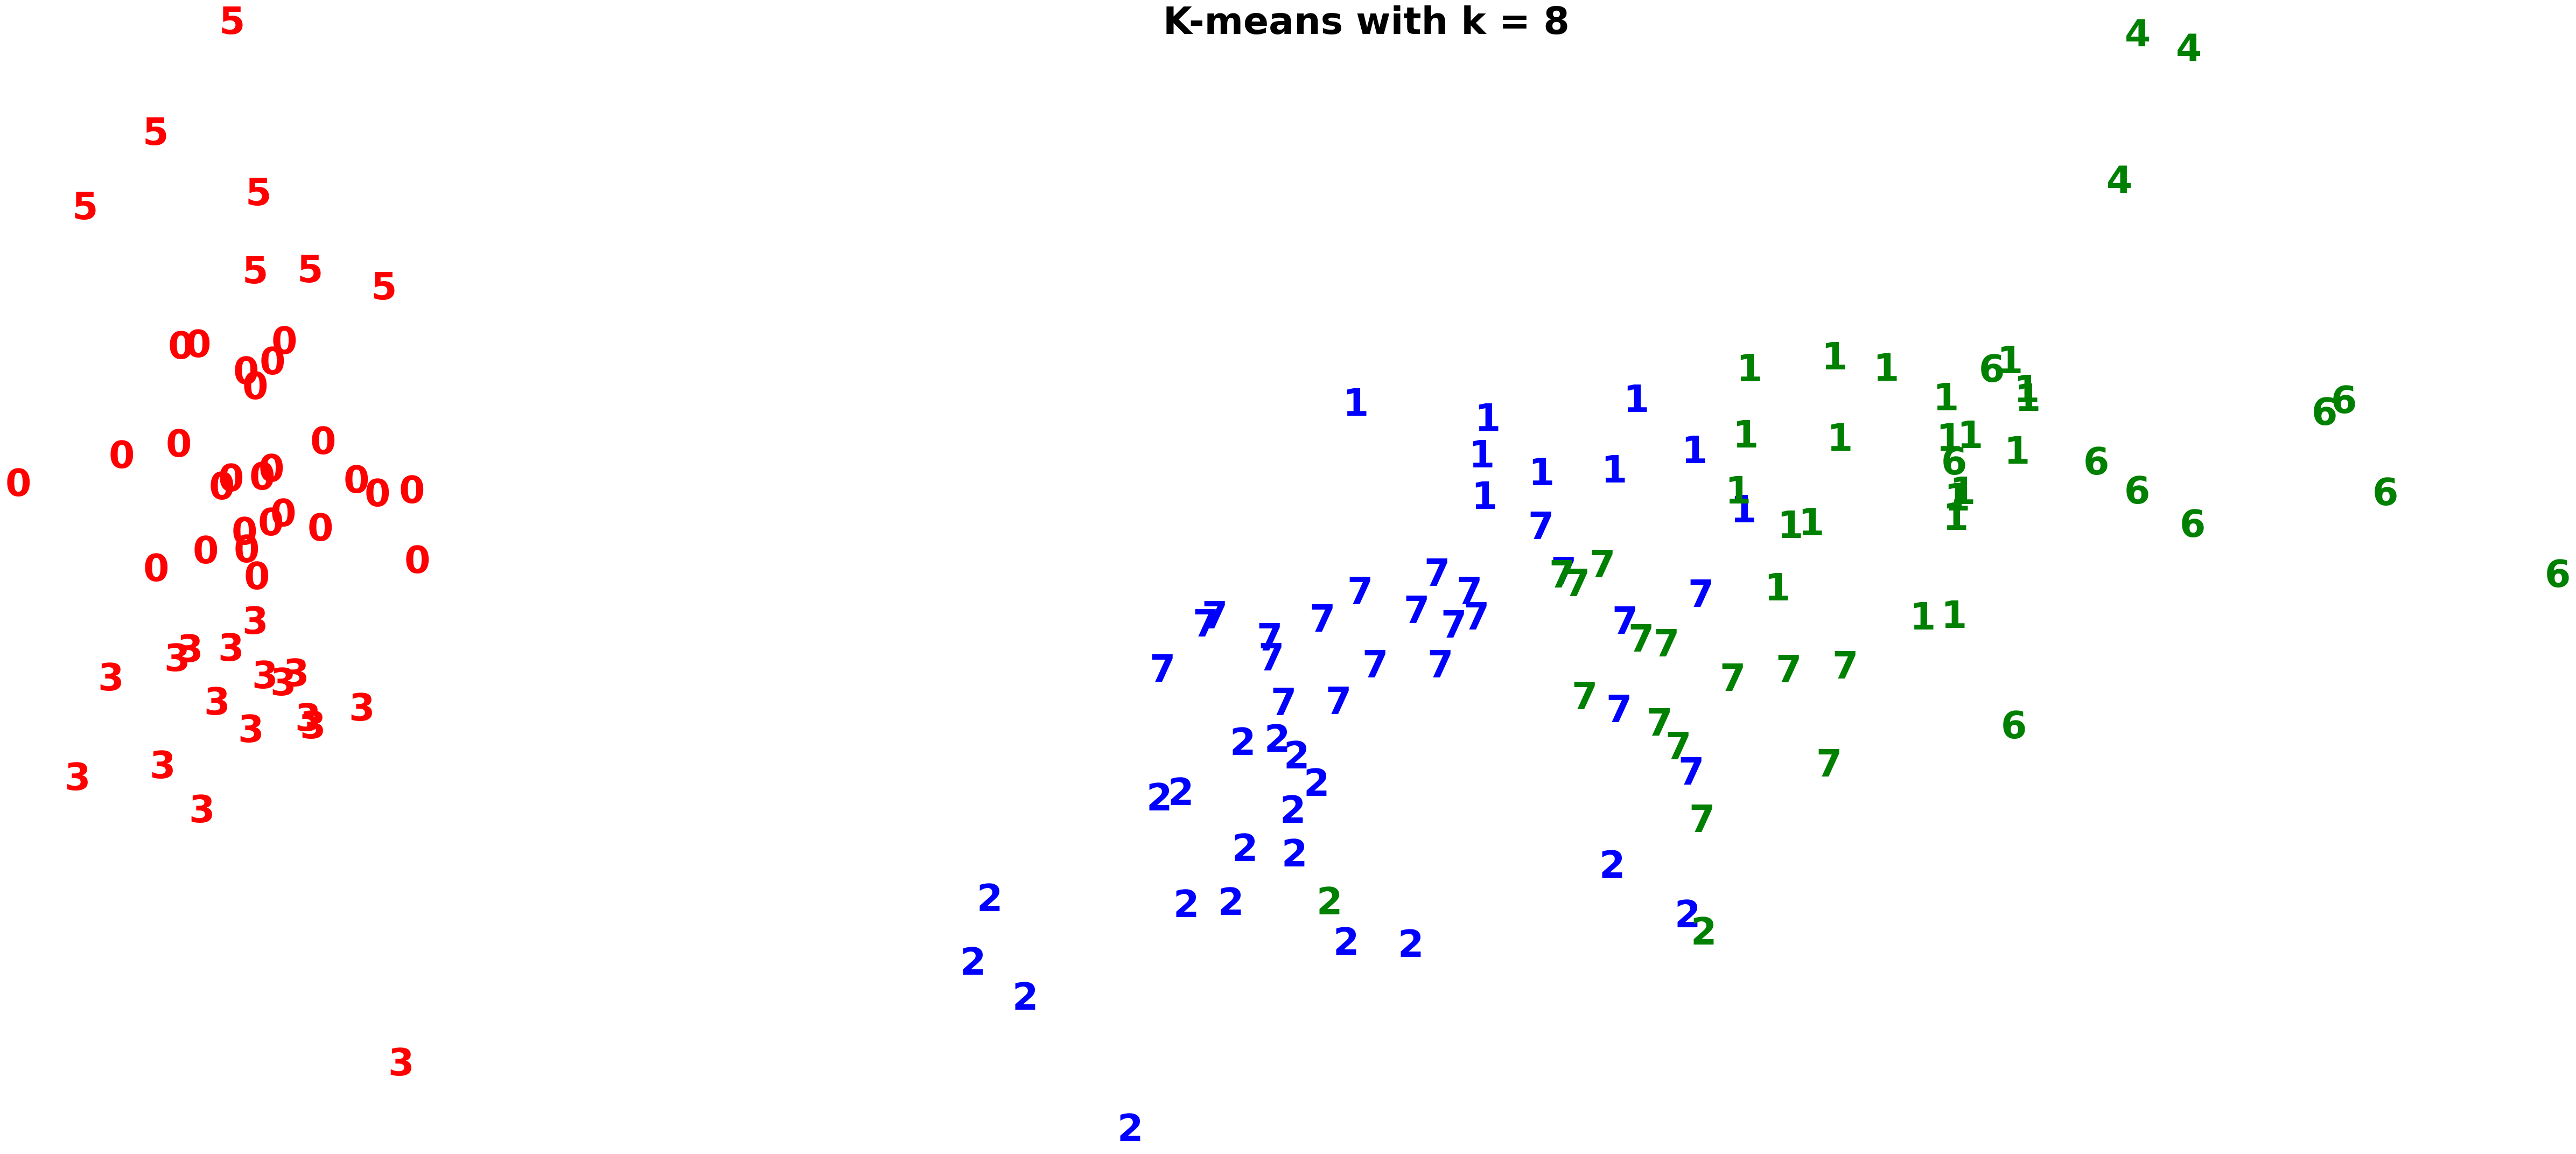

In [10]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(i+1),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

From these solutions, only $k=2$ and $k=3$ assign a single cluster to the linearly separable class at the left most part of the figures. The others assign more than one class (or a single class for $k=1$ which is incorrect). So, $k=2$ or $k=3$ are good choices for the number of clusters. However, when $k=2$, k-means can only assign a single cluster to the linearly non-separable classes where $k=3$ can assign them to two clusters. Therefore, the best solution happens to be where $k=3$.

## Q2. We will now analyze the K-mean algorithms against the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

First, load the dataset from Thinkful's database.

In [11]:
from sqlalchemy import create_engine, text

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

with engine.begin() as conn:
    query = text("""SELECT * FROM heartdisease""")
    heart_disease_df = pd.read_sql_query(query, conn)

# no need for an open connection, as we're only doing a single query
engine.dispose()

Next, perform data preprocessing.

In [12]:
# Define the features and the outcome
X = heart_disease_df.iloc[:, :13]
y = heart_disease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

Finally, analyze if k-means correctly assigns patients to heart disease diagnosis or no heart disease diagnosis clusters. In this case, you actually know the correct number of clusters in the data (two). But you'll test whether k-means assigns observations as you expect it to. Because k-means is an unsupervised learning algorithm, it will be blind to whether or not the patients have heart disease.

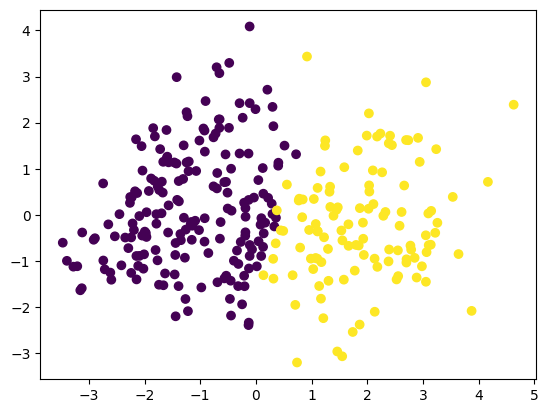

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      151   38
1       13  101


In [13]:
# First, standardized the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Then, reduce the dataset to two dimensions through PCA
X_pca = PCA(n_components=2).fit_transform(X_std)

# Calculate the predicted values
y_pred = KMeans(n_clusters=2, n_init=10, random_state=123).fit_predict(X_std)

# and plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data by cross-tabs/contingency tables
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

We can visualize the crosstab results in a heatmap.

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Heart Disease (1 is a Positive Diagnosis)')]

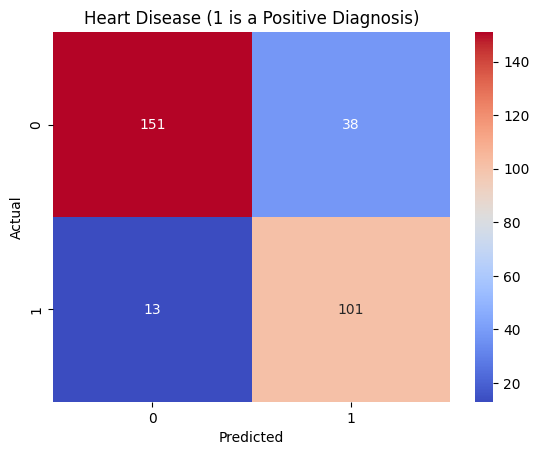

In [29]:
heart_disease_crosstab = pd.crosstab(y_pred, y)
hmap = sns.heatmap(heart_disease_crosstab, cmap = 'coolwarm', annot=True, fmt='.3g')
hmap.set(xlabel='Predicted', ylabel='Actual', title='Heart Disease (1 is a Positive Diagnosis)')

This means that we correcly identified $151+101=252$ cases out of the total of $303.$